In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('Mushroom_data.csv', sep=",",header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
data.columns=["type","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]

In [6]:
print(data.isnull().sum())

type                        0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [7]:
data.describe()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


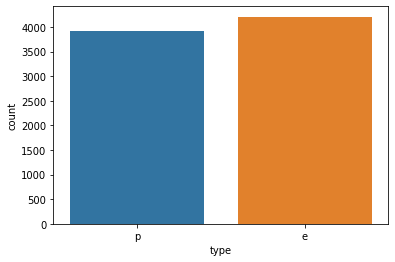

In [8]:
sns.countplot(x="type",data=data)
plt.show()

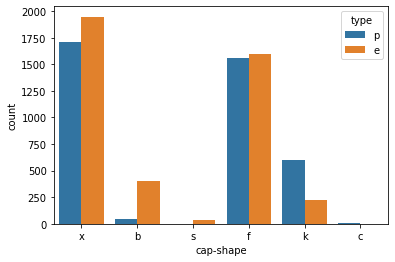

In [9]:
sns.countplot(x="cap-shape",hue="type",data=data)
plt.show()

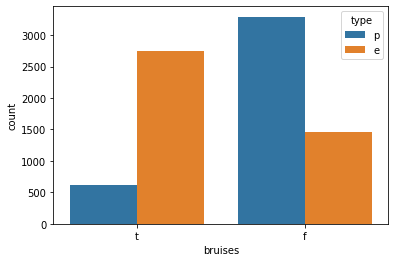

In [10]:
sns.countplot(x="bruises",hue="type",data=data)
plt.show()

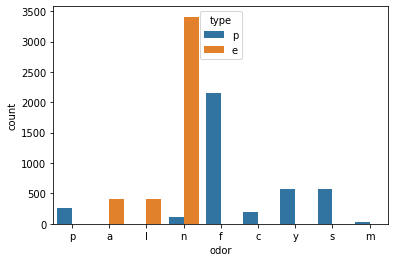

In [11]:
sns.countplot(x="odor",hue="type",data=data)
plt.show()

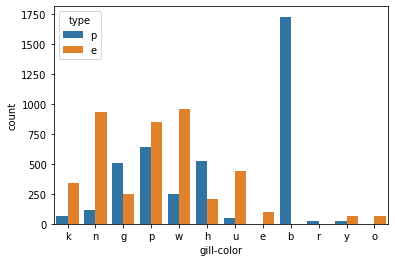

In [12]:
sns.countplot(x="gill-color",hue="type",data=data)
plt.show()

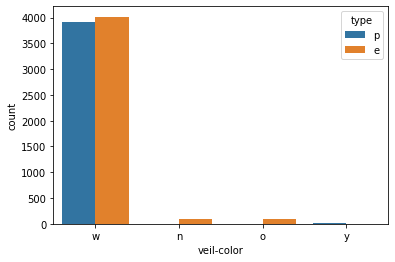

In [13]:
sns.countplot(x="veil-color",hue="type",data=data)
plt.show()

In [14]:
data=data.drop(['veil-color'], axis=1)
data

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,p,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,p,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,p,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,p,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,p,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,p,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,p,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,p,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,p,o,e,w,v,l


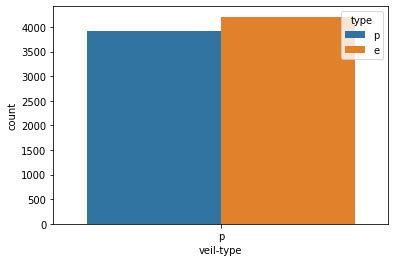

In [15]:
sns.countplot(x="veil-type",hue="type",data=data)
plt.show()

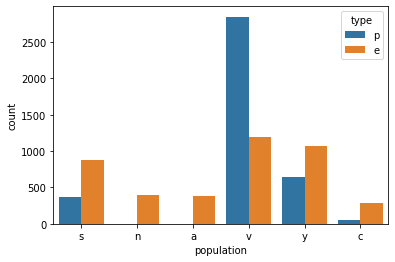

In [16]:
sns.countplot(x="population",hue="type",data=data)
plt.show()

In [17]:
x=data.drop(columns=["type"])
y=data[["type"]]

In [18]:
x=pd.get_dummies(x,drop_first=True)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
xt=sc.transform(x)
xt=pd.DataFrame(x,columns=x.columns)

In [20]:
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [21]:
from sklearn.metrics import f1_score
def maxf1score(cm,x,y):
    maxf1=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20, stratify=y)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        fsc=f1_score(y_test,y_pred)
        if fsc>maxf1:
            maxf1=fsc
            rs=r_state
    print("Maximum f1_score is at random state :",rs," and it is :",maxf1)

In [22]:
# Using Logistic Regression

In [23]:
Logreg=LogisticRegression()
maxf1score(Logreg,x,y)

Maximum f1_score is at random state : 1  and it is : 1.0


In [24]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [25]:
Logreg=LogisticRegression()
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1', 'l2']
hyperparametersLogreg=dict(C=C, penalty=penalty)
gridlr=GridSearchCV(Logreg, hyperparametersLogreg, cv=5, scoring='f1')
gridlr.fit(x,y)
print(gridlr.best_params_)

{'C': 0.01, 'penalty': 'l1'}


In [26]:
print("Mean f1 score for Logistic Regression after cross validation: ", cross_val_score(Logreg,x,y,cv=5,scoring="f1").mean())
print("Standard deviation for Logistic Regression from mean f1 score is : ", cross_val_score(Logreg,x,y,cv=5,scoring="f1").std())

Mean f1 score for Logistic Regression after cross validation:  0.9063614592722835
Standard deviation for Logistic Regression from mean f1 score is :  0.11134376972404306


In [27]:
# Using Random Forest Classifier

In [28]:
rfc=RandomForestClassifier()
maxf1score(rfc,x,y)

Maximum f1_score is at random state : 0  and it is : 1.0


In [29]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [30]:
rfc=RandomForestClassifier()
hyperparametersrfc={'criterion':['gini','entropy'],'max_depth':range(1,10)}
gridrfc=GridSearchCV(rfc, hyperparametersrfc, cv=5, scoring='f1')
gridrfc.fit(x,y)
print(gridrfc.best_params_)

{'criterion': 'gini', 'max_depth': 7}


In [31]:
print("Mean f1 score for Random Forest Classifier after cross validation: ", cross_val_score(rfc,x,y,cv=5,scoring="f1").mean())
print("Standard deviation for Random Forest Classifier from mean f1 score is : ", cross_val_score(rfc,x,y,cv=5,scoring="f1").std())

Mean f1 score for Random Forest Classifier after cross validation:  0.9254757208228688
Standard deviation for Random Forest Classifier from mean f1 score is :  0.08966487711123361


In [32]:
# The above analysis indicates that Random Forest Classifier has the highest f1 score

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=12,test_size=.20,stratify=y)
rfc.fit(x_train,y_train)
predicty=rfc.predict(x_test)
print(confusion_matrix(y_test,predicty))
print(classification_report(y_test,predicty))

[[842   0]
 [  0 783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
from sklearn.externals import joblib
joblib.dump(rfc,'Mushroom_datset_rfc.pkl')